In [16]:
import numpy as np
import pandas as pd

In [106]:
from sklearn.datasets import make_circles, make_moons, make_blobs
samples = 1000
circles = make_circles(n_samples=samples, factor=0.5, noise=0.05)
moons = make_moons(n_samples=samples, noise=0.05)
blobs = make_blobs(n_samples=samples,
                   random_state=8,
                   center_box=(-1, 1),
                   cluster_std=0.1)
rands = np.random.rand(samples, 2), np.zeros(1000)
data = [circles, moons, blobs, rands]

************************ original ************************


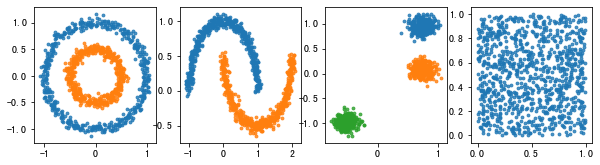

In [126]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  #用来正常显示负号

def modeling(clt_name, clt):
    print('************************', clt_name, '************************')
    fig = plt.figure(figsize=(10, 2.5))
    for i, dataset in enumerate(data):
        X, Y = dataset
        if not clt:
            clt_res = Y
        else:
            clt.fit(X)
            clt_res = clt.labels_.astype(np.int)
        fig.add_subplot(1, len(data), i + 1)
        for j in range(len(pd.value_counts(clt_res))):
            plt.scatter(X[:, 0][clt_res == j],
                        X[:, 1][clt_res == j],
                        s=8,
                        alpha=0.8)

modeling('original', None)

************************ KMeans ************************


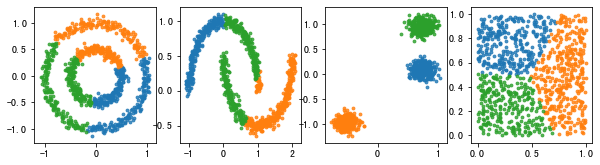

In [128]:
from sklearn.cluster import KMeans
modeling('KMeans',KMeans(n_clusters=3))

************************ DBSCAN ************************


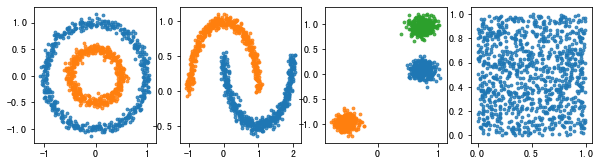

In [130]:
from sklearn.cluster import DBSCAN
modeling('DBSCAN',DBSCAN(min_samples=3,eps=0.2))

************************ Agglomerative ************************


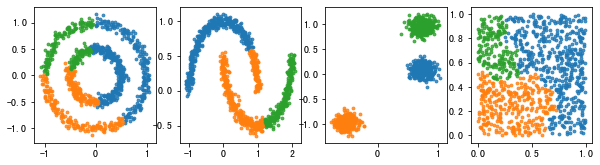

In [131]:
from sklearn.cluster import AgglomerativeClustering
modeling('Agglomerative',AgglomerativeClustering(n_clusters=3,linkage='ward'))